In [1]:
%pylab inline
import h5py 
import programas as pg
import pandas as pd
import grispy as gsp

Populating the interactive namespace from numpy and matplotlib


## analizo la media de todos los perfiles

In [170]:
masa = '2e-04'
delta_gaus = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhogal_'+masa+'_eul_bias_gaus_0-100-'+masa+'-0.9.npy')
delta_exp = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhogal_'+masa+'_eul_bias_expansion_0-100-'+masa+'-0.9.npy')
delta_dm = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhodm_eul_0-100-'+masa+'-0.9.npy')
delta_mio = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_galpos_RedSample_'+masa+'_Top-Hat_rscale_2.5_0-100-'+masa+'-0.9.npy')

In [8]:
masa = '2e-04'
delta_gaus = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhogal_2e-04_eul_bias_gaus_NEW-INTERPOLATION_.npy')
delta_exp = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhogal_2e-04_eul_bias_expansion_NEW-INTERPOLATION_.npy')
delta_dm = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhodm_eul_NEW-INTERPOLATION_.npy')
delta_mio = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_galpos_RedSample_2e-04_CIC_Top-Hat_rscale_1_NEW-INTERPOLATION_.npy')

In [9]:
realizaciones = 50

mean_gaus, error_gaus = pg.perfil_jack(delta_gaus,realizaciones)
mean_exp, error_exp = pg.perfil_jack(delta_exp,realizaciones)
mean_dm, error_dm = pg.perfil_jack(delta_dm,realizaciones)
mean_mio, error_mio = pg.perfil_jack(delta_mio,realizaciones)

In [10]:
quo_gaus, quo_gaus_e = pg.perfil_jack(delta_gaus/mean_dm,realizaciones)
quo_exp, quo_exp_e = pg.perfil_jack(delta_exp/mean_dm,realizaciones)
quo_mio, quo_mio_e = pg.perfil_jack(delta_mio/mean_dm,realizaciones)

In [11]:
dif_gaus = mean_mio-mean_gaus
dif_gaus_e = np.sqrt( (error_mio)**2 + (error_gaus)**2)
dif_exp = mean_mio-mean_exp
dif_exp_e = np.sqrt( (error_mio)**2 + (error_exp)**2)

In [12]:
df = pd.read_csv('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_prop_rhogal_'+masa+'_eul_bias_gaus-0-100-'+masa+'_-0.9.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

In [14]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist,mean_gaus,color='red',lw=2,ls='-',label='gal_gaus')
ax[0].plot(dist,mean_exp,color='blue',lw=2,ls='dashed',label='gal_expansion')
ax[0].plot(dist,mean_dm,color='black',lw=2,ls='dashdot',label='dm')
ax[0].plot(dist,mean_mio,color='green',lw=2,ls='dotted',label='sim smoothed')
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=10)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=10)

ax[0].axhline(y=0,color='grey',ls='dotted')

ax[0].legend(frameon=False,fontsize=10,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=10)
ax[0].minorticks_on()
ax[0].text(2.5,-0.4,'$ \\rm v_{peak}= $'+masa)
ax[0].set_ylim(-1.05,0.2)

ax[1].plot(dist,quo_gaus,color='red',lw=2,ls='-',label='rhogal_gaus')
ax[1].fill_between(dist,quo_gaus-quo_gaus_e,quo_gaus+quo_gaus_e,color='red',alpha=.3)
ax[1].plot(dist,quo_exp,color='blue',lw=2,ls='dashed',label='rhogal_expansion')
ax[1].fill_between(dist,quo_exp-quo_exp_e,quo_exp+quo_exp_e,color='blue',alpha=.3)
ax[1].plot(dist,quo_mio,color='green',lw=2,ls='dotted',label='sim smoothed')
ax[1].fill_between(dist,quo_mio-quo_mio_e,quo_mio+quo_mio_e,color='green',alpha=.3)

#ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1,3.2)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=10)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=10)

ax[1].yaxis.set_tick_params(labelsize=10)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].xaxis.set_tick_params(labelsize=10)


ax[2].plot(dist,dif_gaus/dif_gaus_e,color='red',lw=2,label='rhogal_gaus')
#ax[2].fill_between(dist,dif_gaus-dif_gaus_e,dif_gaus+dif_gaus_e,color='red',alpha=.3)
#ax[2].fill_between(dist,quo_sm-quo_sm_e,quo_sm+quo_sm_e,color='red',alpha=.3)
ax[2].plot(dist,dif_exp/dif_exp_e,color='blue',lw=2,ls='--',label='rhogal_expansion')
#ax[2].fill_between(dist,dif_exp-dif_exp_e,dif_exp+dif_exp_e,color='blue',alpha=.3)

#ax[2].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[2].tick_params(labelsize=10)
ax[2].minorticks_on()
ax[2].set_ylabel('$\\delta_{dm}- \\delta_{gal}$',size=10)
ax[2].set_xlabel('$\\rm d/r_{void}$',size=10)
ax[2].axhline(y=0,color='grey',ls='dotted')
ax[2].set_ylim(-5,5)


#ax[0].text(2,-0.4,'$\\rm v_{peak}=5e-4$',size=12)

(-5.0, 5.0)

In [25]:
df = pd.read_csv('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_prop_rhogal_'+masa+'_eul_bias_gaus-0-100-'+masa+'_-0.8.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

In [40]:
masa = '1e-03'
delta_gaus = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhogal_'+masa+'_eul_bias_gaus_18-100-'+masa+'-0.8.npy')
delta_exp = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhogal_'+masa+'_eul_bias_expansion_18-100-'+masa+'-0.8.npy')
delta_dm = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhodm_eul_18-100-'+masa+'-0.8.npy')
delta_mio1 = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_galpos_RedSample_'+masa+'_CIC_Top-Hat_rscale_1_18-100-'+masa+'-0.8.npy')
delta_mio2 = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_galpos_RedSample_'+masa+'_CIC_Top-Hat_rscale_3_18-100-'+masa+'-0.8.npy')
delta_mio3 = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_galpos_RedSample_'+masa+'_CIC_Top-Hat_rscale_6_18-100-'+masa+'-0.8.npy')
delta_mio4 = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_galpos_RedSample_'+masa+'_CIC_Top-Hat_rscale_8_18-100-'+masa+'-0.8.npy')
delta_mio5 = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_galpos_RedSample_'+masa+'_CIC_Top-Hat_rscale_11_18-100-'+masa+'-0.8.npy')

(-5.0, 5.0)

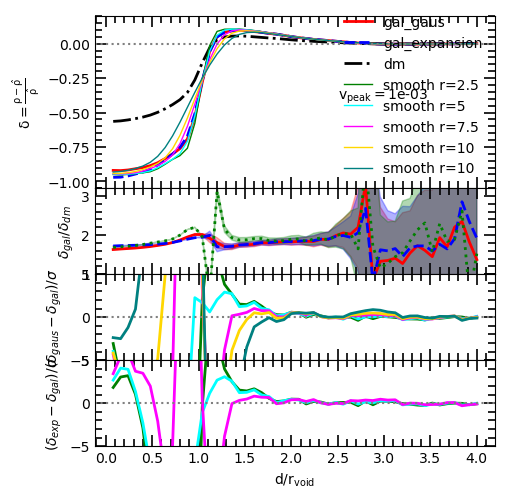

In [41]:
realizaciones = 50

mean_gaus, error_gaus = pg.perfil_jack(delta_gaus,realizaciones)
mean_exp, error_exp = pg.perfil_jack(delta_exp,realizaciones)
mean_dm, error_dm = pg.perfil_jack(delta_dm,realizaciones)
mean_mio1, error_mio1 = pg.perfil_jack(delta_mio1,realizaciones)
mean_mio2, error_mio2 = pg.perfil_jack(delta_mio2,realizaciones)
mean_mio3, error_mio3 = pg.perfil_jack(delta_mio3,realizaciones)
mean_mio4, error_mio4 = pg.perfil_jack(delta_mio4,realizaciones)
mean_mio5, error_mio5 = pg.perfil_jack(delta_mio5,realizaciones)

quo_gaus, quo_gaus_e = pg.perfil_jack(delta_gaus/mean_dm,realizaciones)
quo_exp, quo_exp_e = pg.perfil_jack(delta_exp/mean_dm,realizaciones)
quo_mio1, quo_mio1_e = pg.perfil_jack(delta_mio1/mean_dm,realizaciones)
quo_mio2, quo_mio2_e = pg.perfil_jack(delta_mio2/mean_dm,realizaciones)
quo_mio3, quo_mio3_e = pg.perfil_jack(delta_mio3/mean_dm,realizaciones)
quo_mio4, quo_mio4_e = pg.perfil_jack(delta_mio4/mean_dm,realizaciones)
quo_mio5, quo_mio5_e = pg.perfil_jack(delta_mio5/mean_dm,realizaciones)

dif_gaus1 = mean_mio1-mean_gaus
dif_gaus1_e = np.sqrt( (error_mio1)**2 + (error_gaus)**2)
dif_gaus2 = mean_mio2-mean_gaus
dif_gaus2_e = np.sqrt( (error_mio2)**2 + (error_gaus)**2)
dif_gaus3 = mean_mio3-mean_gaus
dif_gaus3_e = np.sqrt( (error_mio3)**2 + (error_gaus)**2)
dif_gaus4 = mean_mio4-mean_gaus
dif_gaus4_e = np.sqrt( (error_mio4)**2 + (error_gaus)**2)
dif_gaus5 = mean_mio5-mean_gaus
dif_gaus5_e = np.sqrt( (error_mio5)**2 + (error_gaus)**2)

dif_exp1 = mean_mio1-mean_exp
dif_exp1_e = np.sqrt( (error_mio1)**2 + (error_exp)**2)
dif_exp2 = mean_mio2-mean_exp
dif_exp2_e = np.sqrt( (error_mio2)**2 + (error_exp)**2)
dif_exp3 = mean_mio3-mean_exp
dif_exp3_e = np.sqrt( (error_mio3)**2 + (error_exp)**2)
dif_exp4 = mean_mio4-mean_exp
dif_exp4_e = np.sqrt( (error_mio4)**2 + (error_exp)**2)
dif_exp5 = mean_mio5-mean_exp
dif_exp5_e = np.sqrt( (error_mio5)**2 + (error_exp)**2)


fig, ax = plt.subplots(ncols=1,nrows=4,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1, 1, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist,mean_gaus,color='red',lw=2,ls='-',label='gal_gaus')
ax[0].plot(dist,mean_exp,color='blue',lw=2,ls='dashed',label='gal_expansion')
ax[0].plot(dist,mean_dm,color='black',lw=2,ls='dashdot',label='dm')
ax[0].plot(dist,mean_mio1,color='green',lw=1,ls='-',label='smooth r=2.5')
ax[0].plot(dist,mean_mio2,color='cyan',lw=1,ls='-',label='smooth r=5')
ax[0].plot(dist,mean_mio3,color='magenta',lw=1,ls='-',label='smooth r=7.5')
ax[0].plot(dist,mean_mio4,color='gold',lw=1,ls='-',label='smooth r=10')
ax[0].plot(dist,mean_mio5,color='teal',lw=1,ls='-',label='smooth r=10')
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=10)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=10)

ax[0].axhline(y=0,color='grey',ls='dotted')

ax[0].legend(frameon=False,fontsize=10,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=10)
ax[0].minorticks_on()
ax[0].text(2.5,-0.4,'$ \\rm v_{peak}= $'+masa)
ax[0].set_ylim(-1.05,0.2)

ax[1].plot(dist,quo_gaus,color='red',lw=2,ls='-',label='rhogal_gaus')
ax[1].fill_between(dist,quo_gaus-quo_gaus_e,quo_gaus+quo_gaus_e,color='red',alpha=.3)
ax[1].plot(dist,quo_exp,color='blue',lw=2,ls='dashed',label='rhogal_expansion')
ax[1].fill_between(dist,quo_exp-quo_exp_e,quo_exp+quo_exp_e,color='blue',alpha=.3)
ax[1].plot(dist,quo_mio1,color='green',lw=2,ls='dotted',label='sim smoothed')
ax[1].fill_between(dist,quo_mio1-quo_mio1_e,quo_mio1+quo_mio1_e,color='green',alpha=.3)

#ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1,3.2)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=10)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=10)

ax[1].yaxis.set_tick_params(labelsize=10)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].xaxis.set_tick_params(labelsize=10)


ax[2].plot(dist,dif_gaus1/dif_gaus1_e,color='green',lw=2,label='rhogal_gaus1')
ax[2].plot(dist,dif_gaus2/dif_gaus2_e,color='cyan',lw=2,label='rhogal_gaus2')
ax[2].plot(dist,dif_gaus3/dif_gaus3_e,color='magenta',lw=2,label='rhogal_gaus3')
#ax[2].plot(dist,dif_gaus4/dif_gaus4_e,color='gold',lw=2,label='rhogal_gaus4')

#ax[2].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[2].tick_params(labelsize=10)
ax[2].minorticks_on()
ax[2].set_ylabel('$(\\delta_{gaus}- \\delta_{gal})/ \\sigma$',size=10)
ax[2].set_xlabel('$\\rm d/r_{void}$',size=10)
ax[2].axhline(y=0,color='grey',ls='dotted')
ax[2].set_ylim(-5,5)

ax[3].plot(dist,dif_exp1/dif_exp1_e,color='green',lw=2,label='rhogal_gaus1')
ax[3].plot(dist,dif_exp2/dif_exp2_e,color='cyan',lw=2,label='rhogal_gaus2')
ax[3].plot(dist,dif_exp3/dif_exp3_e,color='magenta',lw=2,label='rhogal_gaus3')
ax[2].plot(dist,dif_gaus4/dif_gaus4_e,color='gold',lw=2,label='rhogal_gaus4')
ax[2].plot(dist,dif_gaus5/dif_gaus5_e,color='teal',lw=2,label='rhogal_gaus4')

#ax[2].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
ax[3].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[3].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[3].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[3].tick_params(labelsize=10)
ax[3].minorticks_on()
ax[3].set_ylabel('$(\\delta_{exp}- \\delta_{gal})/ \\sigma$',size=10)
ax[3].set_xlabel('$\\rm d/r_{void}$',size=10)
ax[3].axhline(y=0,color='grey',ls='dotted')
ax[3].set_ylim(-5,5)


In [211]:
1/0.5

2.0

In [176]:
def valores_plot(realizaciones,masa,radiomin,radiomax):
    
    delta_gaus = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhogal_'+masa+'_eul_bias_gaus_'+str(radiomin)+'-'+str(radiomax)+'-'+masa+'-0.9.npy')
    delta_exp = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhogal_'+masa+'_eul_bias_expansion_'+str(radiomin)+'-'+str(radiomax)+'-'+masa+'-0.9.npy')
    delta_dm = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhodm_eul_'+str(radiomin)+'-'+str(radiomax)+'-'+masa+'-0.9.npy')
    
    mean_gaus, error_gaus = pg.perfil_jack(delta_gaus,realizaciones)
    mean_exp, error_exp = pg.perfil_jack(delta_exp,realizaciones)
    mean_dm, error_dm = pg.perfil_jack(delta_dm,realizaciones)
    
    quo_gaus, quo_gaus_e = pg.perfil_jack(delta_gaus/mean_dm,realizaciones)
    quo_exp, quo_exp_e = pg.perfil_jack(delta_exp/mean_dm,realizaciones)
    
    dif_gaus = mean_dm-mean_gaus
    dif_gaus_e = np.sqrt( (error_dm)**2 + (error_gaus)**2)
    dif_exp = mean_dm-mean_exp
    dif_exp_e = np.sqrt( (error_dm)**2 + (error_exp)**2)
    
    df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_'+masa+'_eul_bias_gaus-'+str(radiomin)+'-'+str(radiomax)+'-'+masa+'_-0.9.csv')
    dist = df['distance']
    
    return (mean_gaus, error_gaus, mean_exp, error_exp, mean_dm, error_dm, quo_gaus, quo_gaus_e, quo_exp, quo_exp_e, dif_gaus, dif_gaus_e, dif_exp, dif_exp_e)

In [56]:
(mean_gaus, error_gaus, mean_exp, error_exp, mean_dm, 
 error_dm, quo_gaus, quo_gaus_e, quo_exp, quo_exp_e, 
 dif_gaus, dif_gaus_e, dif_exp, dif_exp_e) = valores_plot(20,'1e-03', 0,100)

In [ ]:
stop

In [156]:
t = pd.read_csv('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_prop_galpos_RedSample_2e-04_Top-Hat_rscale_5-45-100-2e-04_-0.9.csv')

In [154]:
t.columns

Index(['distance', 'media', 'mediana', 'q25', 'q75'], dtype='object')

In [157]:
plt.plot(t['media'])

# Perfiles para diferentes suavizados

In [69]:
masa = '1e-03'
path = '/home/arodriguez/BACCO/bias-voids/perfiles/'
delta_gaus = np.load(path+'perfiles_rhogal_'+masa+'_eul_bias_gaus_smoothed_2_0-100-'+masa+'-0.9.npy')
delta_exp = np.load(path+'perfiles_rhogal_'+masa+'_eul_bias_expansion_smoothed_2_0-100-'+masa+'-0.9.npy')
delta_dm = np.load(path+'perfiles_rhodm_eul_smoothed_2_0-100-'+masa+'-0.9.npy')
delta_mio = np.load(path+'perfiles_galpos_RedSample_'+masa+'_smoothed_2_0-100-'+masa+'-0.9.npy')

In [70]:
realizaciones = 50

mean_gaus, error_gaus = pg.perfil_jack(delta_gaus,realizaciones)
mean_exp, error_exp = pg.perfil_jack(delta_exp,realizaciones)
mean_dm, error_dm = pg.perfil_jack(delta_dm,realizaciones)
mean_mio, error_mio = pg.perfil_jack(delta_mio,realizaciones)

In [71]:
quo_gaus, quo_gaus_e = pg.perfil_jack(delta_gaus/mean_dm,realizaciones)
quo_exp, quo_exp_e = pg.perfil_jack(delta_exp/mean_dm,realizaciones)
quo_mio, quo_mio_e = pg.perfil_jack(delta_mio/mean_dm,realizaciones)

In [72]:
dif_gaus = mean_dm-mean_gaus
dif_gaus_e = np.sqrt( (error_dm)**2 + (error_gaus)**2)
dif_exp = mean_dm-mean_exp
dif_exp_e = np.sqrt( (error_dm)**2 + (error_exp)**2)
dif_mio = mean_dm-mean_mio
dif_mio_e = np.sqrt( (error_dm)**2 + (error_mio)**2)

(-0.1, 0.6)

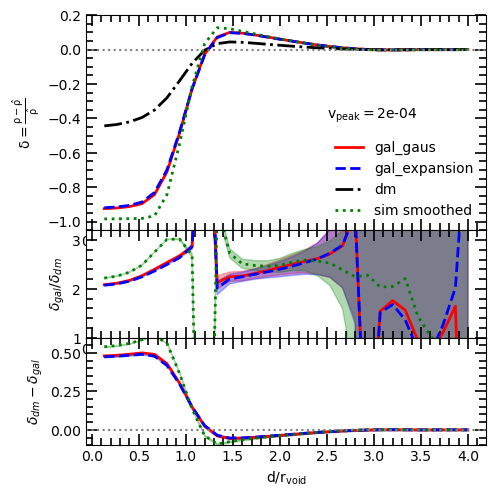

In [73]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist,mean_gaus,color='red',lw=2,ls='-',label='gal_gaus')
ax[0].plot(dist,mean_exp,color='blue',lw=2,ls='dashed',label='gal_expansion')
ax[0].plot(dist,mean_dm,color='black',lw=2,ls='dashdot',label='dm')
ax[0].plot(dist,mean_mio,color='green',lw=2,ls='dotted',label='sim smoothed')
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=10)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=10)

ax[0].axhline(y=0,color='grey',ls='dotted')

ax[0].legend(frameon=False,fontsize=10,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=10)
ax[0].minorticks_on()
ax[0].text(2.5,-0.4,'$ \\rm v_{peak}= $'+masa)
ax[0].set_ylim(-1.05,0.2)

ax[1].plot(dist,quo_gaus,color='red',lw=2,ls='-',label='rhogal_gaus')
ax[1].fill_between(dist,quo_gaus-quo_gaus_e,quo_gaus+quo_gaus_e,color='red',alpha=.3)
ax[1].plot(dist,quo_exp,color='blue',lw=2,ls='dashed',label='rhogal_expansion')
ax[1].fill_between(dist,quo_exp-quo_exp_e,quo_exp+quo_exp_e,color='blue',alpha=.3)
ax[1].plot(dist,quo_mio,color='green',lw=2,ls='dotted',label='sim smoothed')
ax[1].fill_between(dist,quo_mio-quo_mio_e,quo_mio+quo_mio_e,color='green',alpha=.3)

#ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1,3.2)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=10)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=10)

ax[1].yaxis.set_tick_params(labelsize=10)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].xaxis.set_tick_params(labelsize=10)


ax[2].plot(dist,dif_gaus,color='red',lw=2,label='rhogal_gaus')
ax[2].fill_between(dist,dif_gaus-dif_gaus_e,dif_gaus+dif_gaus_e,color='red',alpha=.3)
#ax[2].fill_between(dist,quo_sm-quo_sm_e,quo_sm+quo_sm_e,color='red',alpha=.3)
ax[2].plot(dist,dif_exp,color='blue',lw=2,ls='--',label='rhogal_expansion')
ax[2].fill_between(dist,dif_exp-dif_exp_e,dif_exp+dif_exp_e,color='blue',alpha=.3)
ax[2].plot(dist,dif_mio,color='green',lw=2,ls='dotted',label='sim smoothed')
ax[2].fill_between(dist,dif_mio-dif_mio_e,dif_mio+dif_mio_e,color='green',alpha=.3)

#ax[2].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[2].tick_params(labelsize=10)
ax[2].minorticks_on()
ax[2].set_ylabel('$\\delta_{dm}- \\delta_{gal}$',size=10)
ax[2].set_xlabel('$\\rm d/r_{void}$',size=10)
ax[2].axhline(y=0,color='grey',ls='dotted')
ax[2].set_ylim(-0.1,.6)

In [49]:
delta_mio = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_galpos_RedSample_1e-03_CIC_Top-Hat_rscale_3_0-100-1e-03-0.8.npy')
delta_gaus = np.load('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_rhogal_1e-03_eul_bias_gaus_0-100-1e-03-0.8.npy')

df = pd.read_csv('/home/arodriguez/BACCO/bias-voids/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_gaus-0-100-1e-03_-0.8.csv')
dist = df['distance']

In [50]:
realizaciones = 50

mean_gaus, error_gaus = pg.perfil_jack(delta_gaus,realizaciones)
#mean_exp, error_exp = pg.perfil_jack(delta_exp,realizaciones)
#mean_dm, error_dm = pg.perfil_jack(delta_dm,realizaciones)
mean_mio, error_mio = pg.perfil_jack(delta_mio,realizaciones)

quo_gaus, quo_gaus_e = pg.perfil_jack(delta_gaus/mean_mio,realizaciones)
#quo_exp, quo_exp_e = pg.perfil_jack(delta_exp/mean_dm,realizaciones)
#quo_mio, quo_mio_e = pg.perfil_jack(delta_mio/mean_dm,realizaciones)

dif_gaus = mean_mio-mean_gaus
dif_gaus_e = np.sqrt( (error_mio)**2 + (error_gaus)**2)


(-5.0, 5.0)

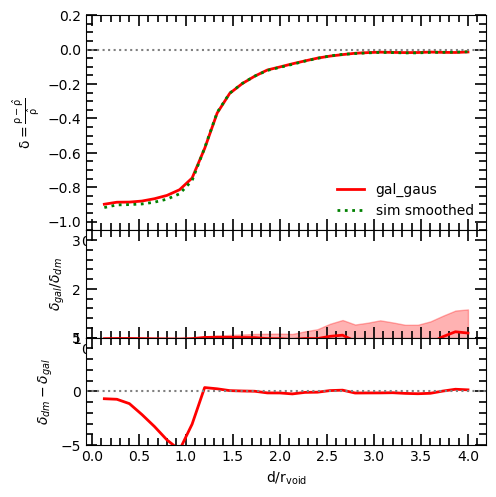

In [52]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist,mean_gaus,color='red',lw=2,ls='-',label='gal_gaus')
#ax[0].plot(dist,mean_exp,color='blue',lw=2,ls='dashed',label='gal_expansion')
#ax[0].plot(dist,mean_dm,color='black',lw=2,ls='dashdot',label='dm')
ax[0].plot(dist,mean_mio,color='green',lw=2,ls='dotted',label='sim smoothed')
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=10)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=10)

ax[0].axhline(y=0,color='grey',ls='dotted')

ax[0].legend(frameon=False,fontsize=10,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=10)
ax[0].minorticks_on()
#ax[0].text(2.5,-0.4,'$ \\rm v_{peak}= $'+masa)
ax[0].set_ylim(-1.05,0.2)

ax[1].plot(dist,quo_gaus,color='red',lw=2,ls='-',label='rhogal_gaus')
ax[1].fill_between(dist,quo_gaus-quo_gaus_e,quo_gaus+quo_gaus_e,color='red',alpha=.3)
#ax[1].plot(dist,quo_exp,color='blue',lw=2,ls='dashed',label='rhogal_expansion')
#ax[1].fill_between(dist,quo_exp-quo_exp_e,quo_exp+quo_exp_e,color='blue',alpha=.3)
#ax[1].plot(dist,quo_mio,color='green',lw=2,ls='dotted',label='sim smoothed')
#ax[1].fill_between(dist,quo_mio-quo_mio_e,quo_mio+quo_mio_e,color='green',alpha=.3)

#ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1,3.2)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=10)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=10)

ax[1].yaxis.set_tick_params(labelsize=10)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].xaxis.set_tick_params(labelsize=10)


ax[2].plot(dist,dif_gaus/dif_gaus_e,color='red',lw=2,label='rhogal_gaus')
#ax[2].fill_between(dist,dif_gaus-dif_gaus_e,dif_gaus+dif_gaus_e,color='red',alpha=.3)
#ax[2].fill_between(dist,quo_sm-quo_sm_e,quo_sm+quo_sm_e,color='red',alpha=.3)
#ax[2].plot(dist,dif_exp,color='blue',lw=2,ls='--',label='rhogal_expansion')
#ax[2].fill_between(dist,dif_exp-dif_exp_e,dif_exp+dif_exp_e,color='blue',alpha=.3)
#ax[2].plot(dist,dif_mio,color='green',lw=2,ls='dotted',label='sim smoothed')
#ax[2].fill_between(dist,dif_mio-dif_mio_e,dif_mio+dif_mio_e,color='green',alpha=.3)

#ax[2].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[2].tick_params(labelsize=10)
ax[2].minorticks_on()
ax[2].set_ylabel('$\\delta_{dm}- \\delta_{gal}$',size=10)
ax[2].set_xlabel('$\\rm d/r_{void}$',size=10)
ax[2].axhline(y=0,color='grey',ls='dotted')
ax[2].set_ylim(-5,5)